In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Carregar o arquivo
df_colesterol = pd.read_csv("./dataset/colesterol.csv")

df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     996 non-null    object 
 2   Fumante             997 non-null    object 
 3   Nível de Atividade  996 non-null    object 
 4   Idade               997 non-null    float64
 5   Peso                997 non-null    float64
 6   Altura              997 non-null    float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [3]:
df_colesterol.head()

,Id,Grupo Sanguíneo,Fumante,Nível de Atividade,Idade,Peso,Altura,Colesterol
0,1,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,2,A,Não,Moderado,68.0,105.0,184.0,236.98
2,3,O,Não,Alto,25.0,64.8,180.0,161.79
3,4,A,Não,Alto,43.0,120.2,167.0,336.24
4,5,AB,Não,Baixo,79.0,88.5,175.0,226.23


In [5]:
df_colesterol.drop(columns=['Id'],axis=1 , inplace=True)

In [8]:
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   grupo_sanguineo            996 non-null    object 
 1   fumante                    997 non-null    object 
 2   nivel_de_atividade_fisica  996 non-null    object 
 3   idade                      997 non-null    float64
 4   peso                       997 non-null    float64
 5   altura                     997 non-null    float64
 6   colesterol                 1000 non-null   float64
dtypes: float64(4), object(3)
memory usage: 54.8+ KB


In [7]:
# Renomear colunas
df_colesterol.columns = [
    "grupo_sanguineo",
    "fumante",
    "nivel_de_atividade_fisica",
    "idade",
    "peso",
    "altura",
    "colesterol"
]

In [9]:
# Copiar DF EDA
df_colesterol_eda = df_colesterol.copy()

In [10]:
# Copiar DF Bucketing
df_colesterol_bucketing = df_colesterol.copy()

## EDA

In [11]:
df_colesterol_eda.head(10)

,grupo_sanguineo,fumante,nivel_de_atividade_fisica,idade,peso,altura,colesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23
5,B,Não,Baixo,68.0,66.8,170.0,185.31
6,A,Sim,Baixo,60.0,117.3,181.0,289.33
7,O,Sim,Moderado,35.0,86.9,174.0,216.48
8,O,Não,Baixo,62.0,81.3,166.0,235.30
9,B,Sim,Alto,44.0,32.7,165.0,97.79


In [12]:
df_colesterol_eda.grupo_sanguineo.unique()

array(['B', 'A', 'O', 'AB', nan], dtype=object)

In [13]:
df_colesterol_eda.grupo_sanguineo.value_counts()

grupo_sanguineo
O     323
AB    268
A     266
B     139
Name: count, dtype: int64

In [20]:
# Detectar esses valoreas ausentes
df_colesterol_eda.isna().sum()

grupo_sanguineo              0
fumante                      0
nivel_de_atividade_fisica    0
idade                        0
peso                         0
altura                       0
colesterol                   0
dtype: int64

In [15]:
# como a quantidade é muito pequena nas categorias categóricas, pode ser preenchido com a moda 
# Vamos olhar para as medidas estatisticas
df_colesterol_eda.describe()

,idade,peso,altura,colesterol
count,997.000000,997.000000,997.000000,1000.000000
mean,49.206620,76.496690,174.889669,199.453260
std,17.476704,21.439132,8.844703,50.625152
min,20.000000,15.400000,160.000000,36.260000
25%,34.000000,61.700000,167.000000,166.345000
50%,49.000000,75.500000,175.000000,199.455000
75%,65.000000,90.200000,183.000000,233.785000
max,79.000000,158.100000,190.000000,372.670000


In [16]:
# Esse peso minimo muito provavelmente é um erro (já q a idade minima é 20anos)
# Vamos coletar medidas das variaveis categoricas

moda_grupo_sanguineo = df_colesterol_eda.grupo_sanguineo.mode()
moda_fumante = df_colesterol_eda.fumante.mode()
moda_nivel_atividade_fisica = df_colesterol_eda.nivel_de_atividade_fisica.mode()

mediana_idade = df_colesterol_eda.idade.median()
mediana_peso = df_colesterol_eda.peso.median()
mediana_altura = df_colesterol_eda.altura.median()

In [19]:
# Preencher valores

df_colesterol_eda.fillna(value={
    'grupo_sanguineo': moda_grupo_sanguineo[0],
    'nivel_de_atividade_fisica': moda_nivel_atividade_fisica[0],
    'fumante': moda_fumante[0],
    'idade': mediana_idade,
    'peso': mediana_peso,
    'altura': mediana_altura
}, inplace=True)

In [21]:
# Converter idade e altura para inteiro

df_colesterol_eda.idade = df_colesterol_eda.idade.astype(int)
df_colesterol_eda.altura = df_colesterol_eda.altura.astype(int)


In [33]:
# Estrutura do DF
df_colesterol_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   grupo_sanguineo            963 non-null    object 
 1   fumante                    963 non-null    object 
 2   nivel_de_atividade_fisica  963 non-null    object 
 3   idade                      963 non-null    int64  
 4   peso                       963 non-null    float64
 5   altura                     963 non-null    int64  
 6   colesterol                 963 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 60.2+ KB


In [23]:
df_colesterol_eda.head(10)

,grupo_sanguineo,fumante,nivel_de_atividade_fisica,idade,peso,altura,colesterol
0,B,Sim,Baixo,33,85.1,186,199.63
1,A,Não,Moderado,68,105.0,184,236.98
2,O,Não,Alto,25,64.8,180,161.79
3,A,Não,Alto,43,120.2,167,336.24
4,AB,Não,Baixo,79,88.5,175,226.23
5,B,Não,Baixo,68,66.8,170,185.31
6,A,Sim,Baixo,60,117.3,181,289.33
7,O,Sim,Moderado,35,86.9,174,216.48
8,O,Não,Baixo,62,81.3,166,235.30
9,B,Sim,Alto,44,32.7,165,97.79


<Axes: ylabel='peso'>

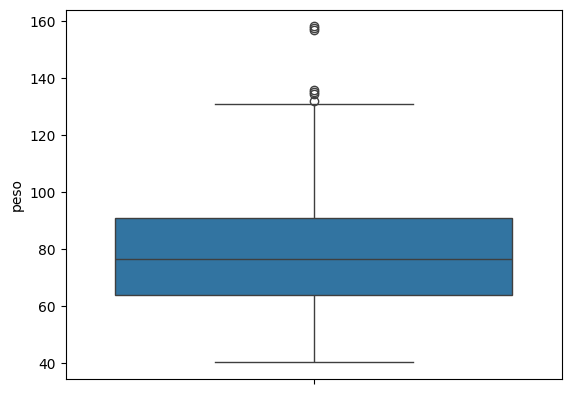

In [34]:
# Verificar / detectar outliers
sns.boxplot(df_colesterol_eda, y = 'peso')

In [ ]:
# Filtrar o público a ser removido

df_colesterol_eda[df_colesterol_eda['peso'] < 40].peso.count()

37

In [32]:
# Remover público do DataFrame
df_colesterol_eda.drop(df_colesterol_eda[df_colesterol_eda['peso'] < 40].index, axis=0, inplace=True)

<Axes: ylabel='altura'>

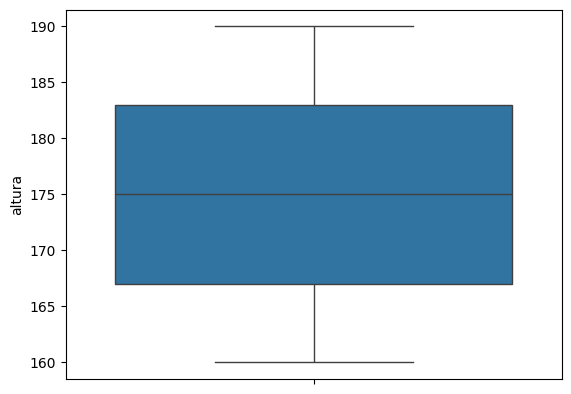

In [35]:
sns.boxplot(df_colesterol_eda, y= 'altura')

<Axes: ylabel='colesterol'>

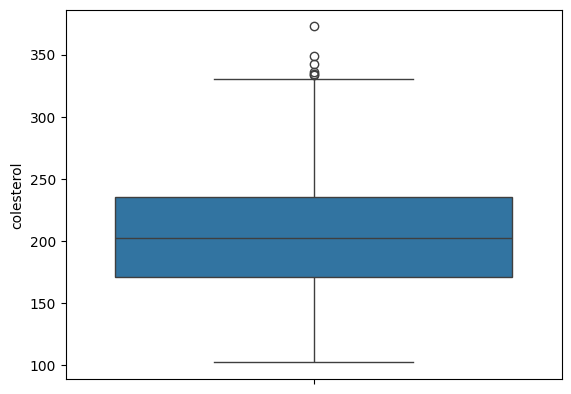

In [37]:
sns.boxplot(df_colesterol_eda, y='colesterol')